In [27]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from pdswe_c import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.12e+00       7.00e-01         1000           1998      
       2          3.01e+00       5.40e-01         2998           5994      
       3          2.05e+00       4.17e-01         8992          (17982)    
Number of nodes is exceeded after iteration 3. 
Maximum relative residual: 2.05e+00 
Maximum boundary residual: 4.17e-01


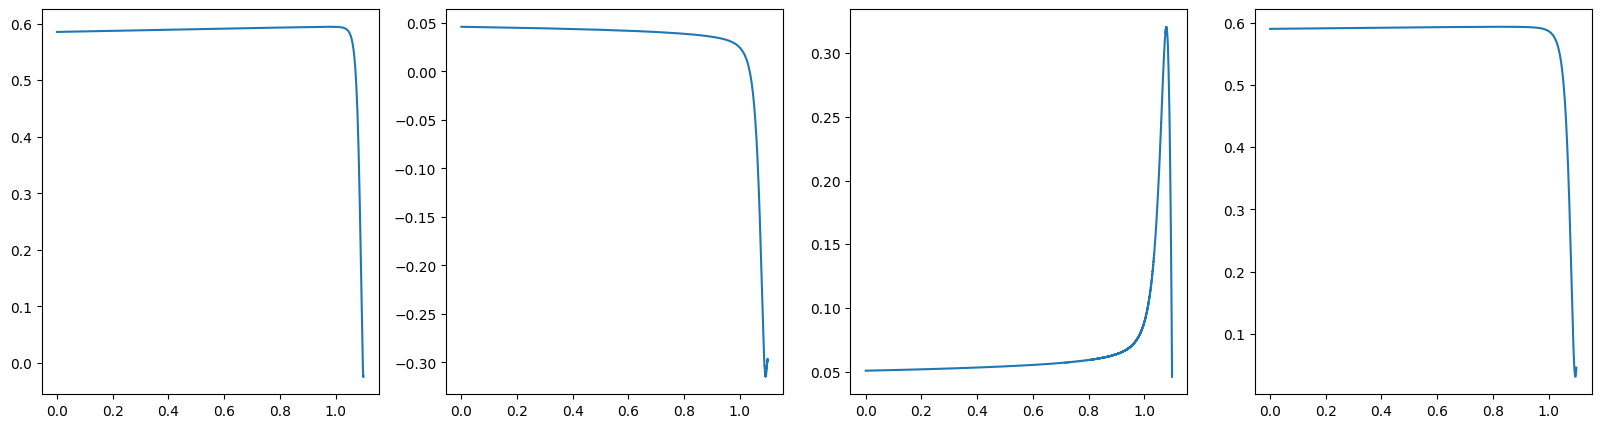

In [28]:


pdswec = PDSWE_C()

pdswec.r = 0.45

pdswec.a_r = 0.1
pdswec.dL = 0.1
pdswec.set_derivative_vars()

pdswec.solve_coupled()
pdswec.visualize_coupled()


 message: The solution converged.
 success: True
  status: 1
     fun: [-6.744e-11 -1.280e-10]
       x: [ 8.853e-03  1.009e+00]
  method: hybr
    nfev: 8
    fjac: [[-2.004e-01  9.797e-01]
           [-9.797e-01 -2.004e-01]]
       r: [ 6.286e+04 -7.548e-01  6.286e+04]
     qtf: [-8.120e-07  1.239e-05]


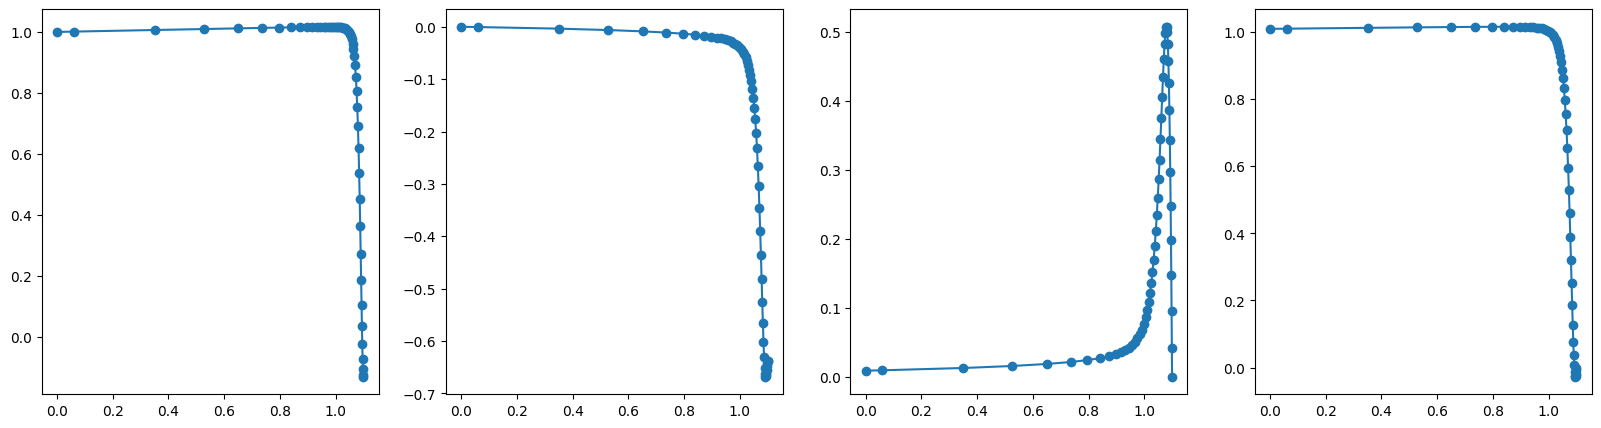

In [29]:

# pdswec.solve_coupled()
# pdswec.visualize_coupled()

pdswec.solve_u_xx()
pdswec.visualize_u_xx()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.951e-02 ...  1.099e+00  1.100e+00]
        y: [[ 8.85341724e-03+1.00872876e+00j
              9.39768767e-03+1.00924713e+00j ...
              4.13397843e-02-8.34782395e-03j
             -6.74352310e-11-1.28008337e-10j]
            [ 8.85341724e-03+8.72875649e-03j
              9.45000915e-03+8.69043103e-03j ...
             -5.68211350e+01+1.11723172e+01j
             -6.09777281e+01+1.24725689e+01j]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000015322C64170>
 t_events: None
 y_events: None
     nfev: 410
     njev: 0
      nlu: 0


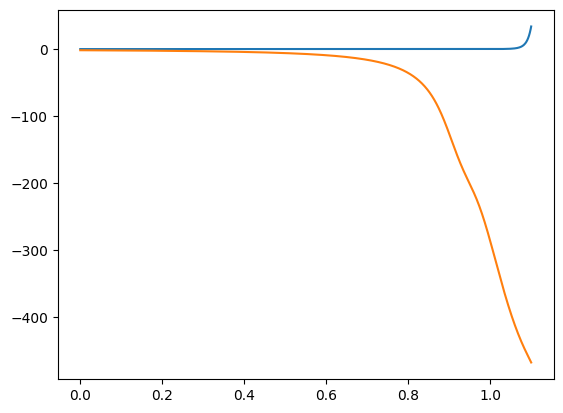

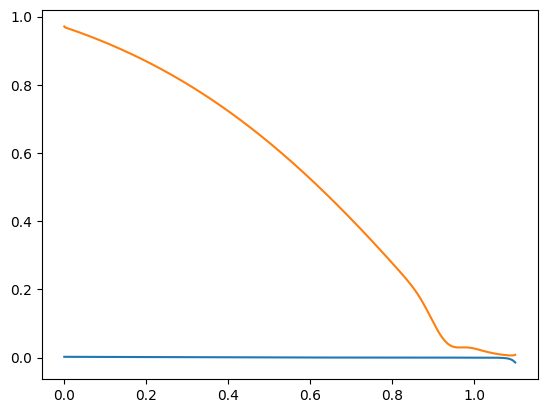

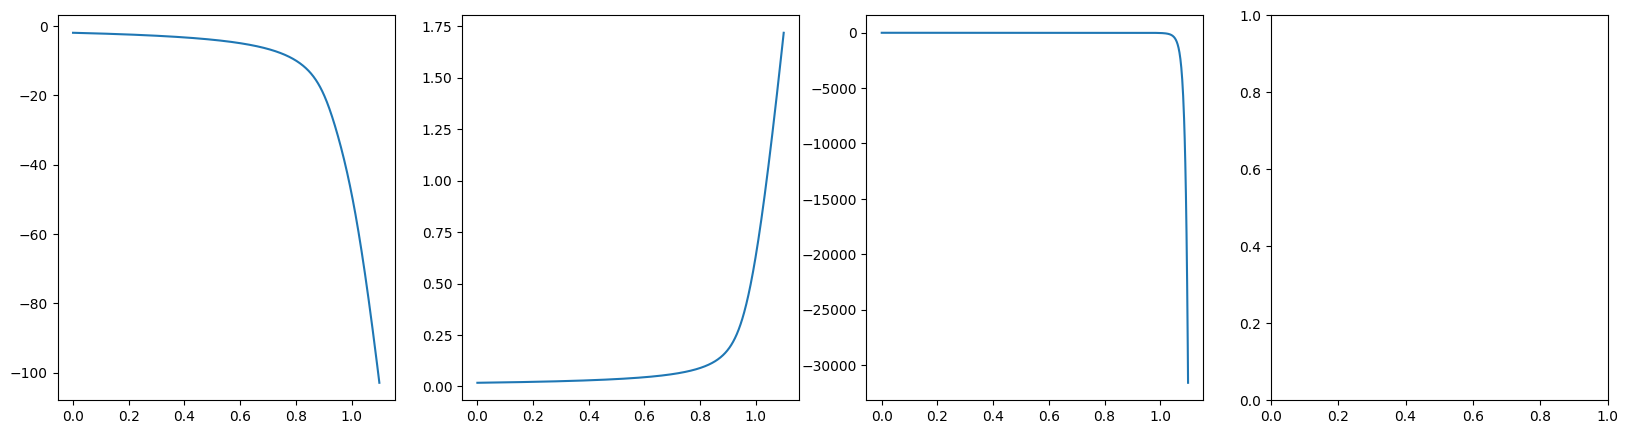

0.22022022022022023


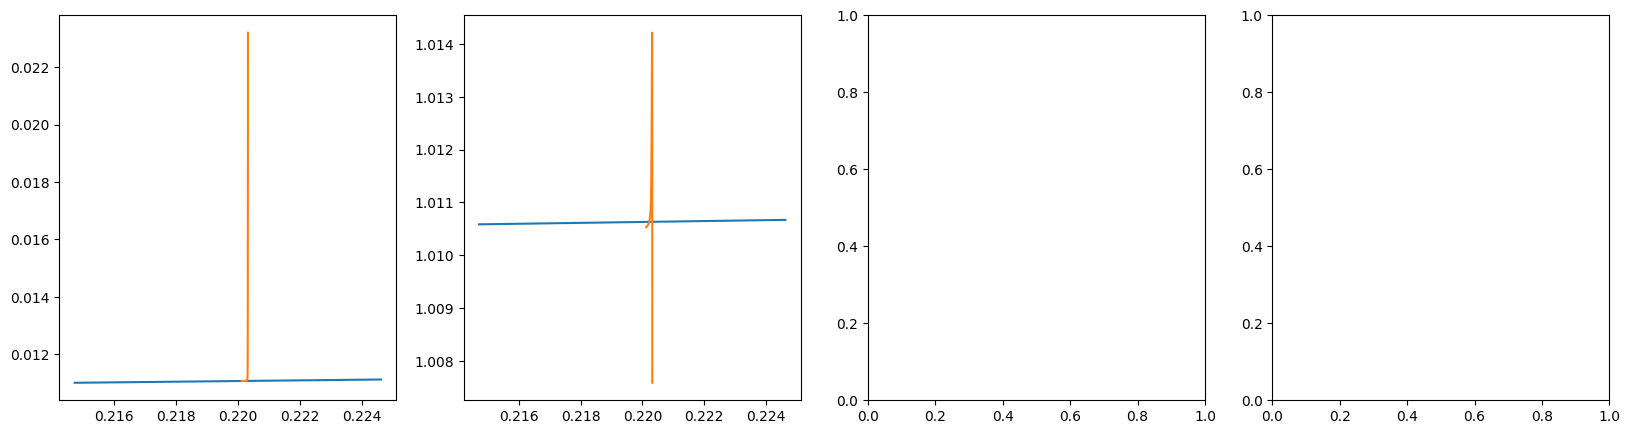

[array([ 8.85341724e-03+8.72875649e-03j,  8.86377482e-03+8.72810917e-03j,
         8.87415650e-03+8.72745970e-03j,  8.88456237e-03+8.72680805e-03j,
         8.89499250e-03+8.72615423e-03j,  8.90544698e-03+8.72549822e-03j,
         8.91592590e-03+8.72484001e-03j,  8.92642934e-03+8.72417960e-03j,
         8.93695739e-03+8.72351697e-03j,  8.94751013e-03+8.72285211e-03j,
         8.95808765e-03+8.72218502e-03j,  8.96869003e-03+8.72151569e-03j,
         8.97931738e-03+8.72084411e-03j,  8.98996976e-03+8.72017026e-03j,
         9.00064728e-03+8.71949414e-03j,  9.01135001e-03+8.71881574e-03j,
         9.02207805e-03+8.71813505e-03j,  9.03283150e-03+8.71745206e-03j,
         9.04361043e-03+8.71676676e-03j,  9.05441494e-03+8.71607913e-03j,
         9.06524513e-03+8.71538918e-03j,  9.07610108e-03+8.71469689e-03j,
         9.08698288e-03+8.71400224e-03j,  9.09789063e-03+8.71330523e-03j,
         9.10882442e-03+8.71260586e-03j,  9.11978435e-03+8.71190410e-03j,
         9.13077050e-03+8.71119995e-03

In [33]:

sol = pdswec.ivp(pdswec.res.x, True)
print(sol)

x_x = np.linspace(0, 1.1, 1000)
u_x, u_x_dx = sol.sol(x_x)

g0_x = pdswec.g0_fx(x_x)
s1_x, s2_x, eta0_x, Y0_x = g0_x
s1_x_dx, s2_x_dx, eta0_x_dx, Y0_x_dx = pdswec.g0_fx_dx(x_x, g0_x)

dz_x = 1j * (Y0_x_dx * u_x + Y0_x * u_x_dx) / eta0_x

uc_x, us_x = real(u_x), imag(u_x)
dzc_x, dzs_x = real(dz_x), imag(dz_x)


pdswec.u_x_dxx_test(x_x, sol.sol(x_x))